# Test of principle:  $\nabla \times B = \mu_0 j$

## Def functions

In [1]:
def curl(gstep, vector):
    """
    vector = [Ax, Ay, Az]
    """
    
    Ax, Ay, Az = vector
    
    def dAdx(A):
        return np.gradient(A, axis = 0) / gstep[0]
    def dAdy(A):
        return np.gradient(A, axis = 1) / gstep[1]
    def dAdz(A):
        return np.gradient(A, axis = 2) / gstep[2]
    
    Cx = dAdy(Az) - dAdz(Ay)
    Cy = dAdz(Ax) - dAdx(Az)
    Cz = dAdx(Ay) - dAdy(Ax)
    
    return [Cx, Cy, Cz]

def dot_product(vector_1, vector_2):
    """
    vector = [Ax, Ay, Az]
    """
    
    Ax, Ay, Az = vector_1
    Bx, By, Bz = vector_2
    
    return Ax[:]*Bx[:] + Ay[:]*By[:] + Az[:]*Bz[:]

def cross_product(vector_1, vector_2):
    """
    vector = [Ax, Ay, Az]
    """
    
    Ax, Ay, Az = vector_1
    Bx, By, Bz = vector_2
    
    Cx = Ay * Bz - Az * Ay
    Cy = Az * Bx - Ax * Bz
    Cz = Ax * By - Ay * Bx
    
    return [Cx, Cy, Cz]
    

def norm(vector):
    """
    vector = [Ax, Ay, Az]
    """
    
    return np.sqrt(dot_product(vector, vector)[:])


## Import modules and functions

In [2]:
# # -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import glob
import re
from math import pi, sqrt

import pylab as pl
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

import import_ipynb
import Module_Diagnostics as MD

from tempfile import mkdtemp
import os.path as path
import json

#import pdb
#pdb.set_trace()

importing Jupyter notebook from Module_Diagnostics.ipynb


## Plot parametering

In [3]:
%matplotlib notebook

## Physics constants

In [4]:
qe = 1.60217662e-19 #C

## Choose run and time for analysis

In [5]:
Cluster = 'Zoidberg'
Cluster = 'Curie'
Cluster = 'Occ'
run_name = '20_04_23_very_rough_big_one_Bz-By-_re'

time = 190
time = '%05d' % time    # Change the time to string format, needed by functions

filepath = '../' + Cluster + '/' + run_name + '/ncfiles/'
date = re.search('w_(.+?)_t', glob.glob(filepath+'Magw*_t'+time+'.nc')[0]).group(1)

print(date)

23_04_20


## Get data in Magw, Hsw and Elew 

#### Clear local tmp folder

In [6]:
!rm -rf /tmp/*

rm: cannot remove '/tmp/systemd-private-8079fe29740a4ff58cdf35a90b126d1f-ModemManager.service-SVM2CX': Operation not permitted
rm: cannot remove '/tmp/systemd-private-8079fe29740a4ff58cdf35a90b126d1f-bolt.service-fDbXqp': Operation not permitted
rm: cannot remove '/tmp/systemd-private-8079fe29740a4ff58cdf35a90b126d1f-colord.service-pRagW1': Operation not permitted
rm: cannot remove '/tmp/systemd-private-8079fe29740a4ff58cdf35a90b126d1f-fwupd.service-4P1dMG': Operation not permitted
rm: cannot remove '/tmp/systemd-private-8079fe29740a4ff58cdf35a90b126d1f-rtkit-daemon.service-yHIV7Y': Operation not permitted
rm: cannot remove '/tmp/systemd-private-8079fe29740a4ff58cdf35a90b126d1f-systemd-resolved.service-3dhNoG': Operation not permitted
rm: cannot remove '/tmp/systemd-private-8079fe29740a4ff58cdf35a90b126d1f-systemd-timesyncd.service-7tM8rr': Operation not permitted


### Upload B, n, E, T, V

In [7]:
## Load B and X, Y, Z

# There might be some MemoryError. In that case, follow the guide:
# https://stackoverflow.com/questions/60563936/memoryerror-unable-to-allocate-3-78-gib-for-an-array-with-shape-802-842-1502
Magw = MD.import_data_3D(filepath, date, time, 'Magw')

x = np.array(np.around(Magw['x']))
y = np.array(np.around(Magw['y']))
z = np.array(np.around(Magw['z']))

cwp = Magw['c_omegapi']
gstep = Magw['gstep']

nx,  ny,  nz  = len(x), len(y), len(z)
# Location of the planet is defined in the .ncfiles as (x,y,z) = (0,0,0)
nx0, ny0, nz0 = int(np.where(x==0)[0]), int(np.where(y==0)[0]), int(np.where(z==0)[0])
            
# Use memmap to alleviate RAM
# This stores big arrays on the disk, but in a way that still allows for most
# operations available on an np.array
file_Bx = path.join(mkdtemp(), 'Bx.dat')            
Bx = np.memmap(file_Bx, dtype='float32', mode='w+', shape=(nx,ny,nz))
Bx[:] = Magw['Bx']
file_By = path.join(mkdtemp(), 'By.dat')            
By = np.memmap(file_By, dtype='float32', mode='w+', shape=(nx,ny,nz))
By[:] = Magw['By']
file_Bz = path.join(mkdtemp(), 'Bz.dat')            
Bz = np.memmap(file_Bz, dtype='float32', mode='w+', shape=(nx,ny,nz))
Bz[:] = Magw['Bz']
del Magw
B = [Bx, By, Bz]

# Use memmap to alleviate RAM
# This stores big arrays on the disk, but in a way that still allows for most
# operations available on an np.array
file_Jrefx = path.join(mkdtemp(), 'Jrefx.dat')            
Jrefx = np.memmap(file_Jrefx, dtype='float32', mode='w+', shape=(nx,ny,nz))
Jrefx[:] = Magw['Jrefx']
file_Jrefy = path.join(mkdtemp(), 'Jrefy.dat')            
Jrefy = np.memmap(file_Jrefy, dtype='float32', mode='w+', shape=(nx,ny,nz))
Jrefy[:] = Magw['Jrefy']
file_Jrefz = path.join(mkdtemp(), 'Jrefz.dat')            
Jrefz = np.memmap(file_Jrefz, dtype='float32', mode='w+', shape=(nx,ny,nz))
Jrefz[:] = Magw['Jrefz']
Jref = [Bx, By, Bz]

# ## Load N, Vxyz, and T
# Hsw = MD.import_data_3D(filepath, date, time, 'Hsw')
# # Density in nb/cm^3
# file_N = path.join(mkdtemp(), 'N.dat')            
# N = np.memmap(file_N, dtype='float32', mode='w+', shape=(nx,ny,nz))
# N[:] = Hsw['n']
# # Velocity in km/s
# file_Vx = path.join(mkdtemp(), 'Vx.dat')            
# Vx = np.memmap(file_Vx, dtype='float32', mode='w+', shape=(nx,ny,nz))
# Vx[:] = Hsw['Vx']
# file_Vy = path.join(mkdtemp(), 'Vy.dat')            
# Vy = np.memmap(file_Vy, dtype='float32', mode='w+', shape=(nx,ny,nz))
# Vy[:] = Hsw['Vy']
# file_Vz = path.join(mkdtemp(), 'Vz.dat')            
# Vz = np.memmap(file_Vz, dtype='float32', mode='w+', shape=(nx,ny,nz))
# Vz[:] = Hsw['Vz']
# # Temperature in eV
# file_T = path.join(mkdtemp(), 'T.dat')            
# T = np.memmap(file_T, dtype='float32', mode='w+', shape=(nx,ny,nz))
# T[:] = Hsw['T']
# del Hsw
# V = [Vx, Vy, Vz]

# ## Load E
# # Electric field in mV/m
# Elew = MD.import_data_3D(filepath, date, time, 'Elew')
# file_Ex = path.join(mkdtemp(), 'Ex.dat')            
# Ex = np.memmap(file_Ex, dtype='float32', mode='w+', shape=(nx,ny,nz))
# Ex[:] = Elew['Ex']*1e6
# file_Ey = path.join(mkdtemp(), 'Ey.dat')            
# Ey = np.memmap(file_Ey, dtype='float32', mode='w+', shape=(nx,ny,nz))
# Ey[:] = Elew['Ey']*1e6
# file_Ez = path.join(mkdtemp(), 'Ez.dat')            
# Ez = np.memmap(file_Ez, dtype='float32', mode='w+', shape=(nx,ny,nz))
# Ez[:] = Elew['Ez']*1e6
# del Elew
# E = [Ex, Ey, Ez]

Reading Bx...
Reading By...
Reading Bz...
Close file and return...
Reading density...
Reading Ux...
Reading Uy...
Reading Uz...
Reading T...
Close file and return...
Reading Ex...
Reading Ey...
Reading Ez...
Close file and return...


### Compute J

In [8]:
gstep_bis = np.mean(x[1:]-x[:-1])

file_Jx = path.join(mkdtemp(), 'Jx.dat')        
Jx = np.memmap(file_Jx, dtype='float32', mode='w+', shape=(nx,ny,nz))
file_Jy = path.join(mkdtemp(), 'Jy.dat')     
Jy = np.memmap(file_Jy, dtype='float32', mode='w+', shape=(nx,ny,nz))
file_Jz = path.join(mkdtemp(), 'Jz.dat') 
Jz = np.memmap(file_Jz, dtype='float32', mode='w+', shape=(nx,ny,nz))
     
Jx[:], Jy[:], Jz[:] = curl(gstep,  B)
           
J = [Jx, Jy, Jz]

## Playground

### Ohm's law

$$ E = - v_i \times B + \frac{j \times B}{n_e q_e} - \frac{\nabla \cdot P_e}{n_e q_e}$$

In [9]:
file_VxBx = path.join(mkdtemp(), 'VxBx.dat')        
VxBx = np.memmap(file_VxBx, dtype='float32', mode='w+', shape=(nx,ny,nz))
file_VxBy = path.join(mkdtemp(), 'VxBy.dat')     
VxBy = np.memmap(file_VxBy, dtype='float32', mode='w+', shape=(nx,ny,nz))
file_VxBz = path.join(mkdtemp(), 'VxBz.dat') 
VxBz = np.memmap(file_VxBz, dtype='float32', mode='w+', shape=(nx,ny,nz))

VxBx[:], VxBy[:], VxBz[:] = cross_product(V, B)
VxB = [VxBx, VxBy, VxBz]

file_JxBx = path.join(mkdtemp(), 'JxBx.dat')        
JxBx = np.memmap(file_JxBx, dtype='float32', mode='w+', shape=(nx,ny,nz))
file_JxBy = path.join(mkdtemp(), 'JxBy.dat')     
JxBy = np.memmap(file_JxBy, dtype='float32', mode='w+', shape=(nx,ny,nz))
file_JxBz = path.join(mkdtemp(), 'JxBz.dat') 
JxBz = np.memmap(file_JxBz, dtype='float32', mode='w+', shape=(nx,ny,nz))

JxBx[:], JxBy[:], JxBz[:] = cross_product(J, B)[:] * (1/(qe*N[:]))
JxB = [JxBx, JxBy, JxBz]

/home/clement/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/clement/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


In [10]:
b = 1e-9
j = b/cwp
v = 1e3

<IPython.core.display.Javascript object>


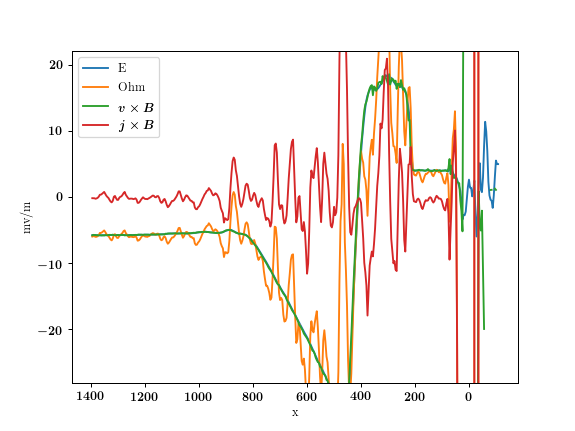

In [11]:
# plt.plot(X, E[2][:, ny0, nz0], label='Ez')
# plt.plot(X, -1e3*b*v*VxB[2][:, ny0, nz0], label='(VxB)z')
# plt.plot(X, 1e3*j*b*JxB[2][:, ny0, nz0], label='(JxB)z')
# plt.xlabel('x')
# plt.xlim([200,400])
# # plt.xlim([400,800])
# plt.ylabel('mv/m')
# plt.gca().invert_xaxis()

# plt.legend()
# plt.show()

i = 2
Ohm = -b*v*VxB[i][:, ny0, nz0] + j*b*JxB[i][:, ny0, nz0]
plt.plot(x, E[i][:, ny0, nz0], label='E')
plt.plot(x, 1e3*Ohm, label='Ohm')
plt.plot(x, 1e3*(-b*v*VxB[i][:, ny0, nz0]), label=r'$v \times B$')
plt.plot(x, 1e3*(j*b*JxB[i][:, ny0, nz0]), label=r'$j \times B$')
plt.xlabel('x')
# plt.xlim([200,800])
mini = np.nanmin(E[i][:, ny0, nz0])*0.8
maxi = np.nanmax(E[i][:, ny0, nz0])*1.2
plt.ylim([mini, maxi])
plt.ylabel('mv/m')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

